In [1]:
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 200

In [2]:
# dataset_path = 'dataset_LP_1.txt' 
dataset_path = 'dataset_LP_2.csv'

df = pd.read_csv(dataset_path, header=None)
df.head()

,0,1,2,3
0,-6.672418,-1.206198,-1.081050,0
1,1.675598,0.614994,-0.971600,0
2,-4.039058,0.335102,0.544618,1
3,0.793526,-0.235277,0.551771,1
4,3.820273,-0.274691,0.454743,1


In [3]:
df.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.162699,0.052964,0.002570,0.50000
std,3.012325,0.994853,1.051784,0.50025
min,-9.794328,-2.946732,-1.627253,0.00000
25%,-1.851837,-0.639598,-1.003386,0.00000
50%,0.252959,0.063701,-0.424821,0.50000
75%,2.177363,0.722395,1.036763,1.00000
max,9.256746,3.063029,2.059943,1.00000


In [4]:
X = df[df.columns[:-1]].to_numpy()
y = df[df.columns[-1]].to_numpy()

y[y == 0] = -1

In [5]:
X.shape

(1000, 3)

In [6]:
def hpad_ones(X):
    padding = np.ones((X.shape[0], 1))
    X = np.hstack((padding, X))
    
    return X

In [7]:
# Padding with Ones to add bias term
X = hpad_ones(X)

In [8]:
X.shape, y.shape

((1000, 4), (1000,))

In [9]:
X[0].shape

(4,)

In [10]:
def classify(x, w):
    return 1 if w.T @ x > 0 else -1

In [11]:
def get_weight(n):
#     return np.random.randn(n, 1)
    return np.ones((n, 1))

In [12]:
def sgd(w, X, y, learning_rate=0.1, epochs=10):
    accuracy = []
    for i in tqdm(range(epochs)):
        for x, t in zip(X, y):
            acc = test(w, X, y)
            accuracy.append(acc)
            
            # if acc > .9:
            #    return w, accuracy
            
            if (t * classify(x, w) < 0):
                w += learning_rate * t * x.reshape(-1, 1)
                
    
        # Calculate Accuracy
        accuracy.append(test(w, X, y))
        
    plt.plot(accuracy)            
    return w, accuracy

In [13]:
def test(w, X, y):
    incorrect = 0
    correct = 0
    
    for x, t in zip(X, y):
        if (t * classify(x, w) < 0):
            incorrect += 1
        else:
            correct += 1

    # Calculate Accuracy
    acc = correct / (correct + incorrect)
    
    return acc

In [14]:
w = get_weight(X.shape[1])
test(w, X, y)

0.617

100%|██████████| 1/1 [00:02<00:00,  2.95s/it]


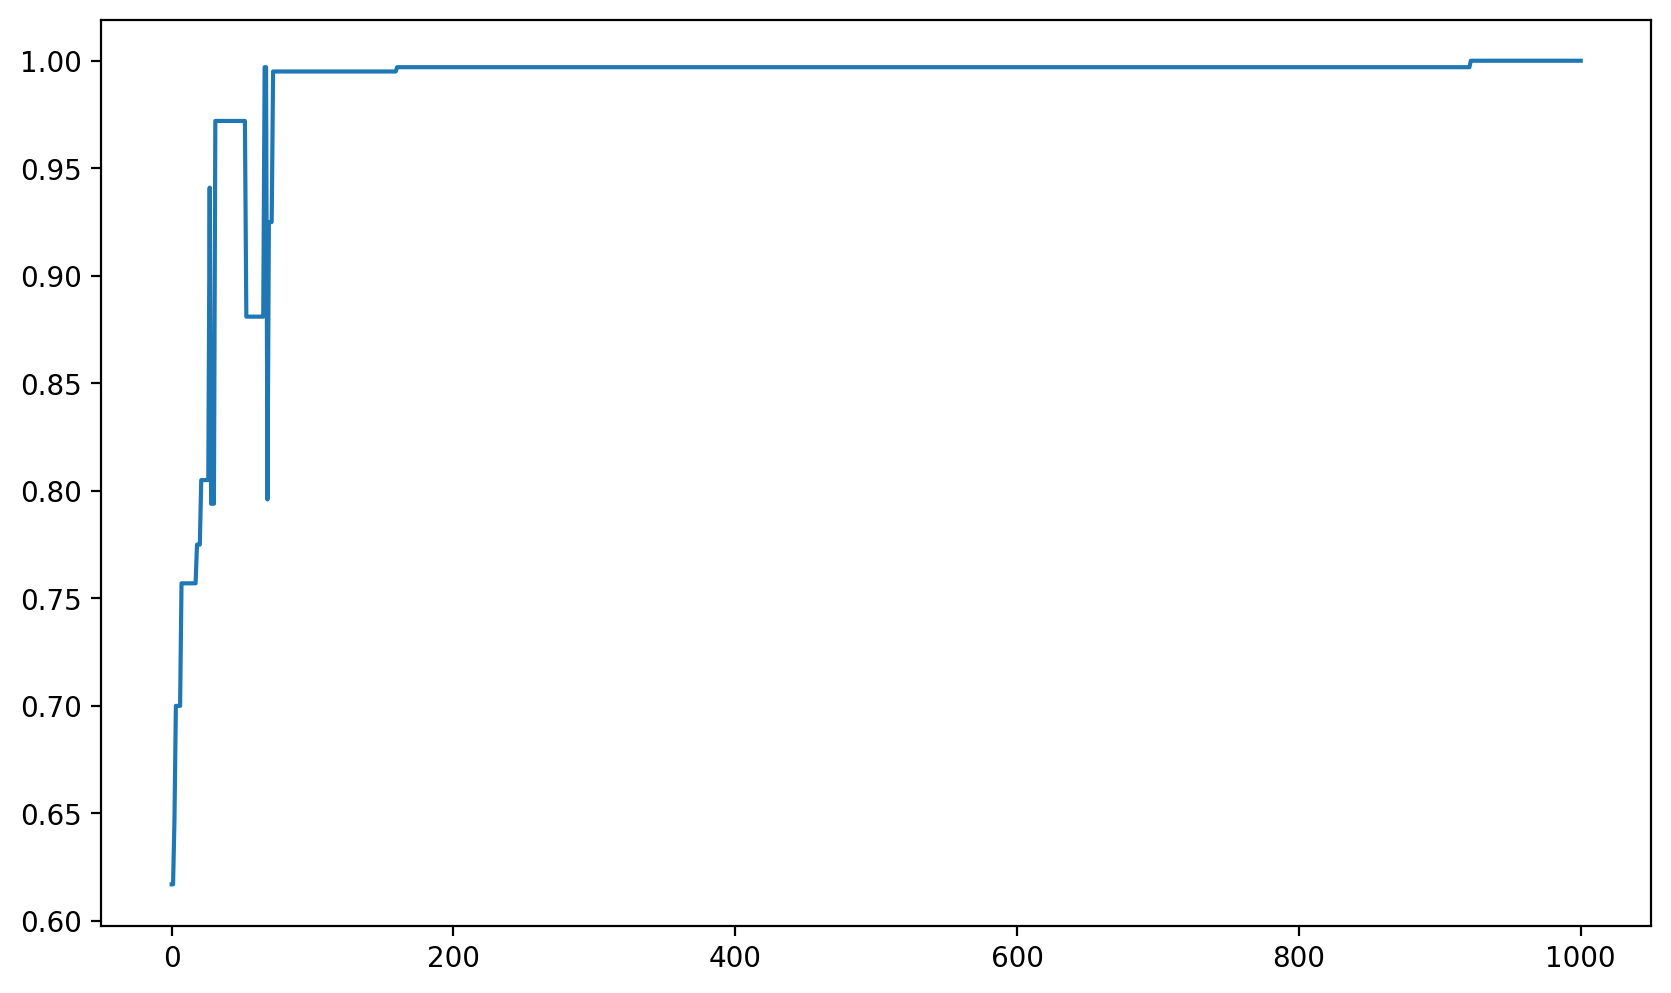

In [15]:
w, accuracy = sgd(w, X, y, epochs=1)

In [16]:
test(w, X, y)

1.0